In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import xgboost as xgb

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

"""XGBoost で多値分類するサンプルコード"""


'XGBoost で多値分類するサンプルコード'

# Irisデータセットを読み込む

In [3]:
dataset = datasets.load_iris()
#dataset

In [4]:
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=y)

In [7]:
X_train
y_train

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [8]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [9]:
xgb_params = {
    #多値分類問題
    'objective':'multi:softmax',
    #クラス数
    'num_class':3,
    #学習用の指標（Multiclass logloss)
    'eval_metric':'mlogloss',
}
evals=[(dtrain,'train'),(dtest,'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
               dtrain,
               num_boost_round=1000,
               early_stopping_rounds=10,
               evals=evals,
               evals_result=evals_result,
               )

[0]	train-mlogloss:0.742287	eval-mlogloss:0.765776
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:0.530648	eval-mlogloss:0.565862
[2]	train-mlogloss:0.39291	eval-mlogloss:0.441114
[3]	train-mlogloss:0.298636	eval-mlogloss:0.357715
[4]	train-mlogloss:0.231609	eval-mlogloss:0.303035
[5]	train-mlogloss:0.183134	eval-mlogloss:0.269981
[6]	train-mlogloss:0.147745	eval-mlogloss:0.244587
[7]	train-mlogloss:0.121195	eval-mlogloss:0.228647
[8]	train-mlogloss:0.101356	eval-mlogloss:0.21806
[9]	train-mlogloss:0.086442	eval-mlogloss:0.209126
[10]	train-mlogloss:0.074785	eval-mlogloss:0.206222
[11]	train-mlogloss:0.064011	eval-mlogloss:0.209763
[12]	train-mlogloss:0.056541	eval-mlogloss:0.204977
[13]	train-mlogloss:0.050953	eval-mlogloss:0.203838
[14]	train-mlogloss:0.046365	eval-mlogloss:0.199503
[15]	train-mlogloss:0.043192	eval-mlogloss:0.198099
[16]	train-mlogloss:0.039852	

In [10]:
y_pred = bst.predict(dtest)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9333333333333333


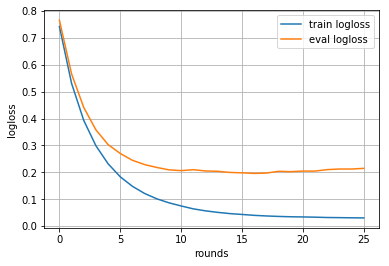

In [11]:
train_metric = evals_result['train']['mlogloss']
plt.plot(train_metric, label='train logloss')
eval_metric = evals_result['eval']['mlogloss']
plt.plot(eval_metric, label='eval logloss')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()

乳がんデータセットに比べると、単純な分だけラウンド数がかなり少ないようだ。

得られた学習過程のグラフは次の通り。 学習用データの損失は減っているものの、検証用データの損失が減らない状況が生じていることから過学習の予兆が見られる。